In [12]:
import matplotlib.pyplot as plt
import earthpy.plot as ep
import earthpy.spatial as es
import numpy as np
from skimage import exposure

In [13]:
# read metadata into dictionary
def read_mlt(path):
    mlt_dict = {}
    with open(path, 'r') as _:
        for line in _:
            line = line.strip()
            if line != 'END':
                key, value = line.split(' =')
                mlt_dict[key] = value.replace('"', '').lstrip()
    return mlt_dict

# read raw data for each band and create a array stack
def create_bands_array_stack(folder, mlt_dict):
    bands_paths = [ folder + '/' + mlt_dict['FILE_NAME_BAND_1'], # coastal/aerosol
                    folder + '/' + mlt_dict['FILE_NAME_BAND_2'], # blue
                    folder + '/' + mlt_dict['FILE_NAME_BAND_3'], # green
                    folder + '/' + mlt_dict['FILE_NAME_BAND_4'], # red
                    folder + '/' + mlt_dict['FILE_NAME_BAND_5'], # NIR
                    folder + '/' + mlt_dict['FILE_NAME_BAND_6'], # SWIR 1
                    folder + '/' + mlt_dict['FILE_NAME_BAND_7'], # SWIR 2
                    folder + '/' + mlt_dict['FILE_NAME_BAND_10'],# TIRS 1 (Thermal Infrared)
                    folder + '/' + mlt_dict['FILE_NAME_BAND_11'] # TIRS 2 (Thermal Infrared)
                    ]
    arr_st, meta = es.stack(bands_paths)
    return arr_st

# stretch the array values equally between min and max
def stretch(arr, str_clip):
    s_min = str_clip
    s_max = 100 - str_clip
    arr_rescaled = np.zeros_like(arr)
    for ii, band in enumerate(arr):
        lower, upper = np.nanpercentile(band, (s_min, s_max))
        arr_rescaled[ii] = exposure.rescale_intensity(
            band, in_range=(lower, upper)
        )
    return arr_rescaled.copy()

def norm(array):
    min_value = np.min(array[array != 0])
    max_value = np.max(array)
    normalized_array = (array - min_value) * (255 / (max_value - min_value))
    return normalized_array.astype(np.uint8)

In [51]:
def dn_to_radiance(mlt_dict, data_array, band):
    # Extracting ML and AL from the metadata dictionary
    ml_key = 'RADIANCE_MULT_BAND_' + str(band)
    al_key = 'RADIANCE_ADD_BAND_' + str(band)
    ml = float(mlt_dict.get(ml_key))
    al = float(mlt_dict.get(al_key))

    # Applying the conversion formula
    radiance = ml * data_array + al

    return radiance


In [52]:

def dn_to_reflectance(mlt_dict, data_array, band):
    # Extracting Mρ and Aρ from the metadata dictionary
    m_rho_key = 'REFLECTANCE_MULT_BAND_' + str(band)
    a_rho_key = 'REFLECTANCE_ADD_BAND_' + str(band)
    m_rho = float(mlt_dict.get(m_rho_key))
    a_rho = float(mlt_dict.get(a_rho_key))

    # Applying the conversion formula
    reflectance_prime = m_rho * data_array + a_rho

    # Extracting solar elevation angle from metadata
    solar_elevation = float(mlt_dict.get('SUN_ELEVATION'))

    # Calculating solar zenith angle
    solar_zenith = 90.0 - solar_elevation

    # Correcting for solar angle
    reflectance = reflectance_prime / np.sin(np.deg2rad(solar_zenith))

    return reflectance


In [54]:

def dn_to_brightness_temperature(mlt_dict, data_array, band):
    # Extracting K1 and K2 from the metadata dictionary
    k1_key = 'K1_CONSTANT_BAND_' + str(band)
    k2_key = 'K2_CONSTANT_BAND_' + str(band)
    k1 = float(mlt_dict.get(k1_key))
    k2 = float(mlt_dict.get(k2_key))

    # Applying the conversion formula
    radiance = dn_to_radiance(mlt_dict, data_array, band)  # Get radiance from previous conversion
    brightness_temp = k2 / (np.log((k1 / radiance) + 1))

    return brightness_temp


In [55]:
#This will help you confirm whether the path is correct
print(dir + '/' + data_set + '_MTL.txt')

C:/Users/recep/Downloads/Landsat9Data/Landsat9Data/LC09_L1TP_192028_20230924_20230924_02_T1_MTL.txt


In [56]:
import os
import glob

# Directory containing the files
directory_path = r"C:\Users\recep\Downloads\Landsat9Data\Landsat9Data"

# Find all files in the directory
all_files = glob.glob(os.path.join(directory_path, "*"))

# Filter only files with the .txt extension
metadata_files = [file for file in all_files if file.endswith('.txt')]

# Print the list of metadata files
print("Metadata files found:")
for file in metadata_files:
    print(file)


Metadata files found:
C:\Users\recep\Downloads\Landsat9Data\Landsat9Data\LC09_L1TP_192028_20230924_20230924_02_T1_MTL.txt


In [57]:
# directory of the dataset
dir = 'C:/Users/recep/Downloads/Landsat9Data/Landsat9Data'
data_set = 'LC09_L1TP_192028_20230924_20230924_02_T1'
mlt_dict = read_mlt(os.path.join(dir, data_set + '_MTL.txt'))
bands_stack = create_bands_array_stack(dir, mlt_dict)




# TODO plot RGB
# Make use of the earthpy package. This package contains also usefull methods for other tasks

# TODO convert bands 1-7 to radiance
# if you want to stack the bands again use np.stack( ..., axis=0)

# TODO plot histograms of all bands with radiance data


# TODO convert bands 1-7 to reflectance
# if you want to stack the bands again use np.stack( ..., axis=0)


# TODO plot images of bands 1-7 with reflectance data
# use "stretch(..., 2)" (str_clip=2 is default) to convert a data array to a equally distributed array which looks better as image

# TODO plot RGB image with reflectance data. Dont worry if there are strange lines like from a scan in the image.


# TODO convert band 10 and 11 to TOA brightness temperature
# TODO plot images of band 10 and 11 with TOA brightness temperature
# Dont worry if there are strange lines like from a scan in the image.
# use "norm(...)" to normalize the brightness temperature data before stretching it
# use "stretch(..., 2)" (str_clip=2 is default) to convert a data array to a equally distributed array which looks better as image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


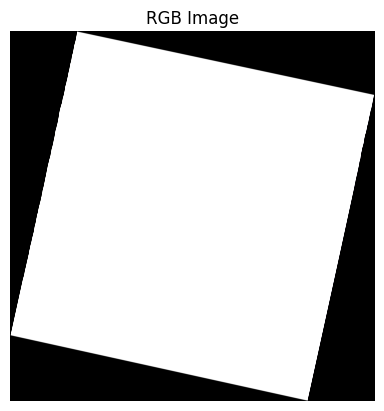

In [68]:
## Task 1.1: RGB Image

# Open the Python Notebook AtmosphericCorrection.ipynb and get familiar with the code.
# Plot an RGB image using the appropriate bands (2: blue, 3: green, 4: red)

# Extracting blue, green, and red bands from the stack
blue_band = bands_stack[1]  # Band 2 is blue
green_band = bands_stack[2]  # Band 3 is green
red_band = bands_stack[3]  # Band 4 is red

# Create RGB image
rgb_image = np.dstack((red_band, green_band, blue_band))

# Plot RGB image
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()



In [60]:
print(rgb_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


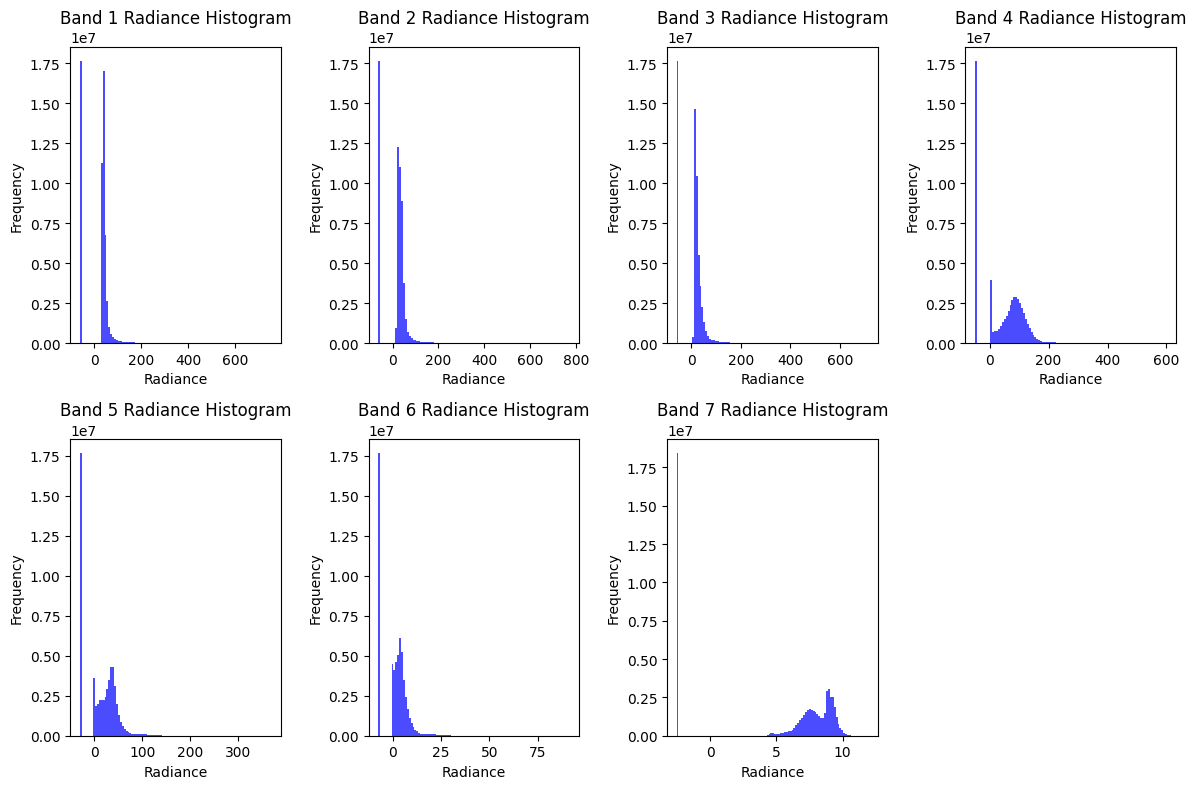

In [69]:
# Task 1.2: Refleectance
# Implement the dn_to_radiance function. This function converts the numerical data from a single band into radiance at the top of atmosphere.
# Plot histograms for band 1-7 in radiance.

def dn_to_radiance(mlt_dict, data_array, band):
    # Extracting ML and AL from the metadata dictionary
    ml_key = 'RADIANCE_MULT_BAND_' + str(band)
    al_key = 'RADIANCE_ADD_BAND_' + str(band)
    ml = float(mlt_dict.get(ml_key))
    al = float(mlt_dict.get(al_key))

    # Applying the conversion formula
    radiance = ml * data_array + al

    return radiance

# Plot histograms for bands 1-7 in radiance
plt.figure(figsize=(12, 8))
for band_num in range(1, 8):
    radiance_band = dn_to_radiance(mlt_dict, bands_stack[band_num], band_num)
    plt.subplot(2, 4, band_num)
    plt.hist(radiance_band.flatten(), bins=100, color='blue', alpha=0.7)
    plt.title(f'Band {band_num} Radiance Histogram')
    plt.xlabel('Radiance')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




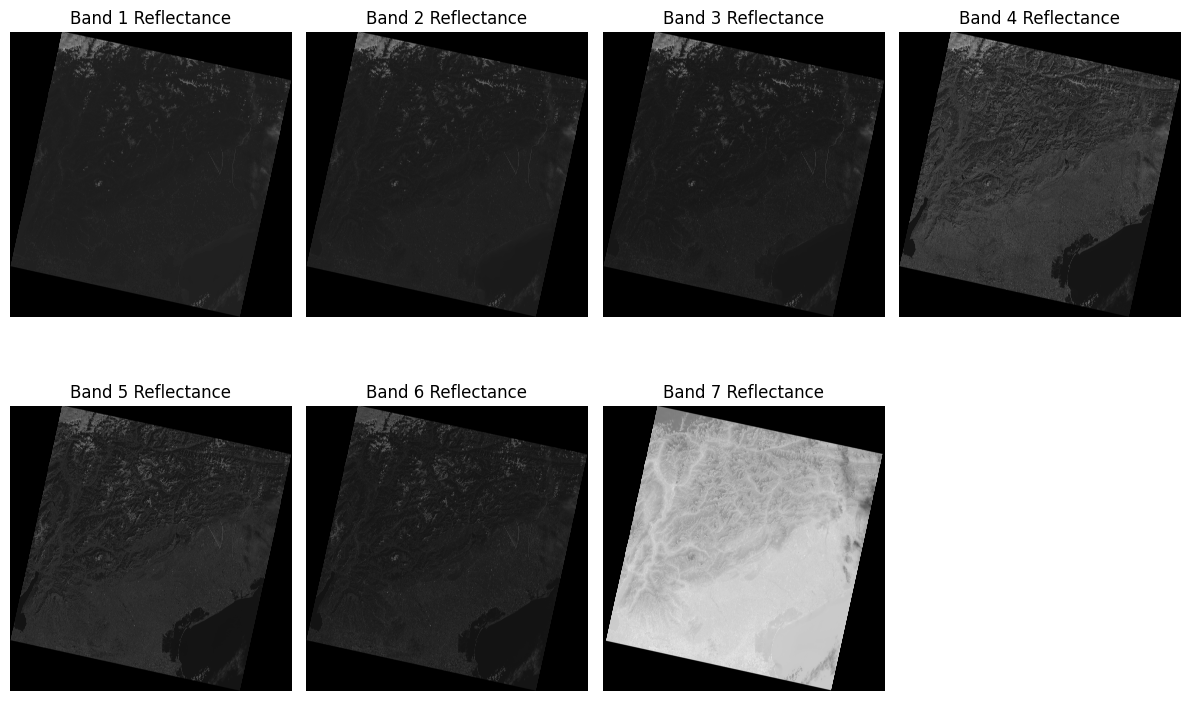

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


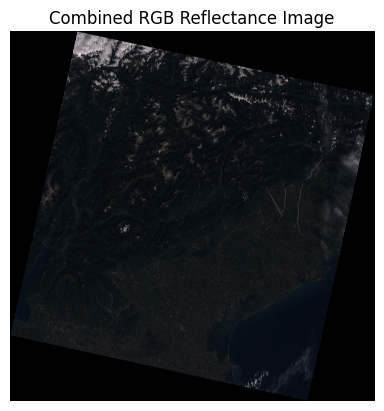

In [70]:
# Task 1.3: Radiance

# Implement the dn_to_refectance function. This function converts the numerical data from a single band into refectance at the top of atmosphere.
# Plot band 1-7 as image and the combined RGB image and note down two interesting observations.

def dn_to_reflectance(mlt_dict, data_array, band):
    # Extracting Mρ and Aρ from the metadata dictionary
    m_rho_key = 'REFLECTANCE_MULT_BAND_' + str(band)
    a_rho_key = 'REFLECTANCE_ADD_BAND_' + str(band)
    m_rho = float(mlt_dict.get(m_rho_key))
    a_rho = float(mlt_dict.get(a_rho_key))

    # Applying the conversion formula
    reflectance_prime = m_rho * data_array + a_rho

    # Extracting solar elevation angle from metadata
    solar_elevation = float(mlt_dict.get('SUN_ELEVATION'))

    # Calculating solar zenith angle
    solar_zenith = 90.0 - solar_elevation

    # Correcting for solar angle
    reflectance = reflectance_prime / np.sin(np.deg2rad(solar_zenith))

    return reflectance

# Plot band 1-7 as images
plt.figure(figsize=(12, 8))
for band_num in range(1, 8):
    reflectance_band = dn_to_reflectance(mlt_dict, bands_stack[band_num], band_num)
    plt.subplot(2, 4, band_num)
    plt.imshow(reflectance_band, cmap='gray')
    plt.title(f'Band {band_num} Reflectance')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot combined RGB image
rgb_reflectance = np.dstack((dn_to_reflectance(mlt_dict, bands_stack[3], 4),
                             dn_to_reflectance(mlt_dict, bands_stack[2], 3),
                             dn_to_reflectance(mlt_dict, bands_stack[1], 2)))
plt.imshow(rgb_reflectance)
plt.title('Combined RGB Reflectance Image')
plt.axis('off')
plt.show()



In [65]:
print("bands_stack array:", bands_stack.shape)


bands_stack array: (9, 7751, 7641)


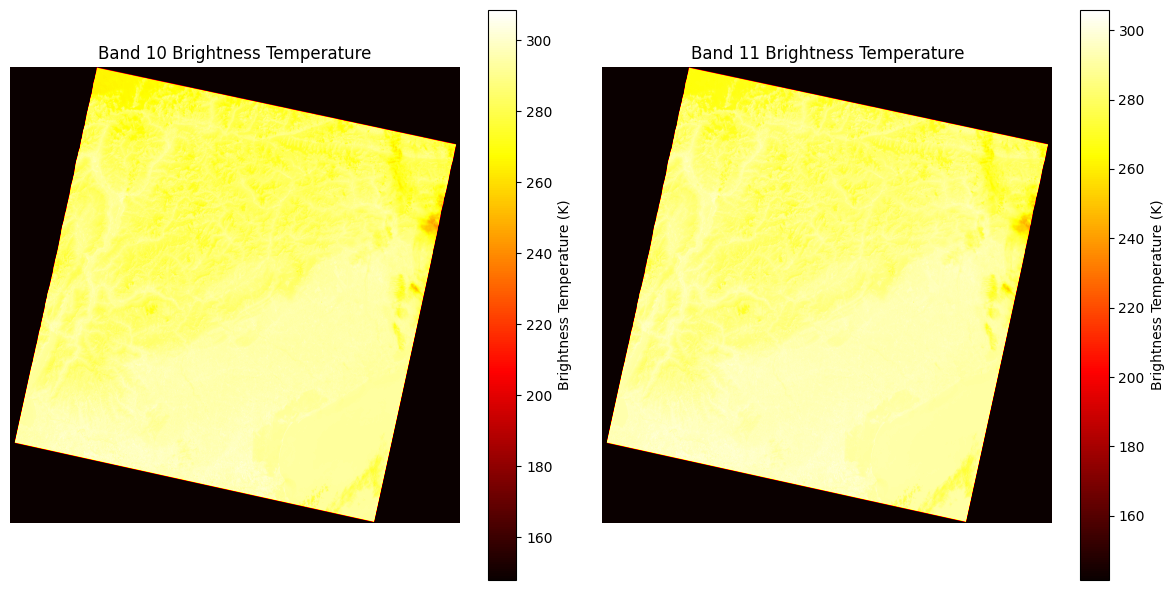

In [71]:
# Task 1.4: Brightness Temperature
# Implement the dn_to_brightness_temperature function. This function converts the top of atmosphere brightnes temperature from the spectral radiance (the result of the previous task). Plot band 10 and 11 in TOA brightness temperature data as image.

def dn_to_brightness_temperature(mlt_dict, data_array, band):
    # Extracting K1 and K2 from the metadata dictionary
    k1_key = 'K1_CONSTANT_BAND_' + str(band)
    k2_key = 'K2_CONSTANT_BAND_' + str(band)
    k1 = float(mlt_dict.get(k1_key))
    k2 = float(mlt_dict.get(k2_key))

    # Applying the conversion formula
    radiance = dn_to_radiance(mlt_dict, data_array, band)  # Get radiance from previous conversion
    brightness_temp = k2 / (np.log((k1 / radiance) + 1))

    return brightness_temp


# Plot band 10 and 11 in TOA brightness temperature data as images
plt.figure(figsize=(12, 6))

# Band 10
plt.subplot(1, 2, 1)
band_10_brightness_temp = dn_to_brightness_temperature(mlt_dict, bands_stack[7], 10)
plt.imshow(band_10_brightness_temp, cmap='hot')
plt.title('Band 10 Brightness Temperature')
plt.colorbar(label='Brightness Temperature (K)')
plt.axis('off')

# Band 11
plt.subplot(1, 2, 2)
band_11_brightness_temp = dn_to_brightness_temperature(mlt_dict, bands_stack[8], 11)
plt.imshow(band_11_brightness_temp, cmap='hot')
plt.title('Band 11 Brightness Temperature')
plt.colorbar(label='Brightness Temperature (K)')
plt.axis('off')

plt.tight_layout()
plt.show()




